#### Table of Contents:

[Importing Libraries](#Importing-Libraries)

[Heatmaps & Correlations](#Creating-Heatmaps-and-looking-at-correlations)

[Creating our Model](#Creating-our-Model)

[Generating Predictions](#Generating-Predictions-and-checking-scores)

[Model Selection](#Model-Selection!)

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm
import sklearn
import missingno as msno

pd.set_option('display.max_columns', None)

In [2]:
test_clean = pd.read_csv('datasets/test_clean.csv')

In [3]:
test_clean = test_clean.drop(columns=['Unnamed: 0'])

In [4]:
train_clean = pd.read_csv('./datasets/train_clean.csv')

In [5]:
train_clean = train_clean.drop(columns=['Unnamed: 0'])

In [6]:
test_clean.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_cond,foundation,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_cond,paved_drive,wood_deck_sf,pool_area,misc_val,mo_sold,yr_sold,sale_type,totporch,remodelyears,totalsqft,saleprice
0,2658,902301120,RM,69.0,9142,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,Fa,Stone,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,No fireplace,Detchd,1910.0,Unf,1,440,Po,Y,0,0,0,4,2006,WD,172,40,1928,NaN
1,2718,905108090,RL,0.0,9662,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,CBlock,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,0,1967,0,0,2,0,6,2,TA,10,Typ,0,No fireplace,Attchd,1977.0,Fin,2,580,TA,Y,170,0,0,8,2006,WD,0,0,1967,NaN
2,2414,528218130,RL,58.0,17104,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,Y,100,0,0,9,2006,New,24,0,1496,NaN
3,1989,902207150,RM,60.0,8520,Pave,Reg,Lvl,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,CBlock,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,0,968,0,0,1,0,2,1,TA,5,Typ,0,No fireplace,Detchd,1935.0,Unf,2,480,TA,N,0,0,0,7,2007,WD,184,83,968,NaN
4,625,535105100,RL,0.0,9500,Pave,IR1,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,CBlock,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,Y,0,0,0,7,2009,WD,261,0,1394,NaN


In [7]:
train_clean.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_cond,foundation,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_cond,paved_drive,wood_deck_sf,pool_area,misc_val,mo_sold,yr_sold,sale_type,totporch,remodelyears,totalsqft,saleprice
0,109,533352170,RL,0.0,13517,Pave,IR1,Lvl,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,TA,CBlock,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,No fireplace,Attchd,1976.0,RFn,2.0,475.0,TA,Y,0,0,0,3,2010,WD,44,29,1479,130500
1,544,531379050,RL,43.0,11492,Pave,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,TA,PConc,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,Y,0,0,0,4,2009,WD,74,1,2122,220000
2,153,535304180,RL,68.0,7922,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,CBlock,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,No fireplace,Detchd,1953.0,Unf,1.0,246.0,TA,Y,0,0,0,1,2010,WD,52,54,1057,109000
3,318,916386060,RL,73.0,9802,Pave,Reg,Lvl,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,PConc,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,No fireplace,BuiltIn,2007.0,Fin,2.0,400.0,TA,Y,100,0,0,4,2010,WD,0,1,1444,174000
4,255,906425045,RL,82.0,14235,Pave,IR1,Lvl,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,PConc,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,No fireplace,Detchd,1957.0,Unf,2.0,484.0,TA,N,0,0,0,3,2010,WD,59,93,1445,138500


## Creating Heatmaps and looking at correlations

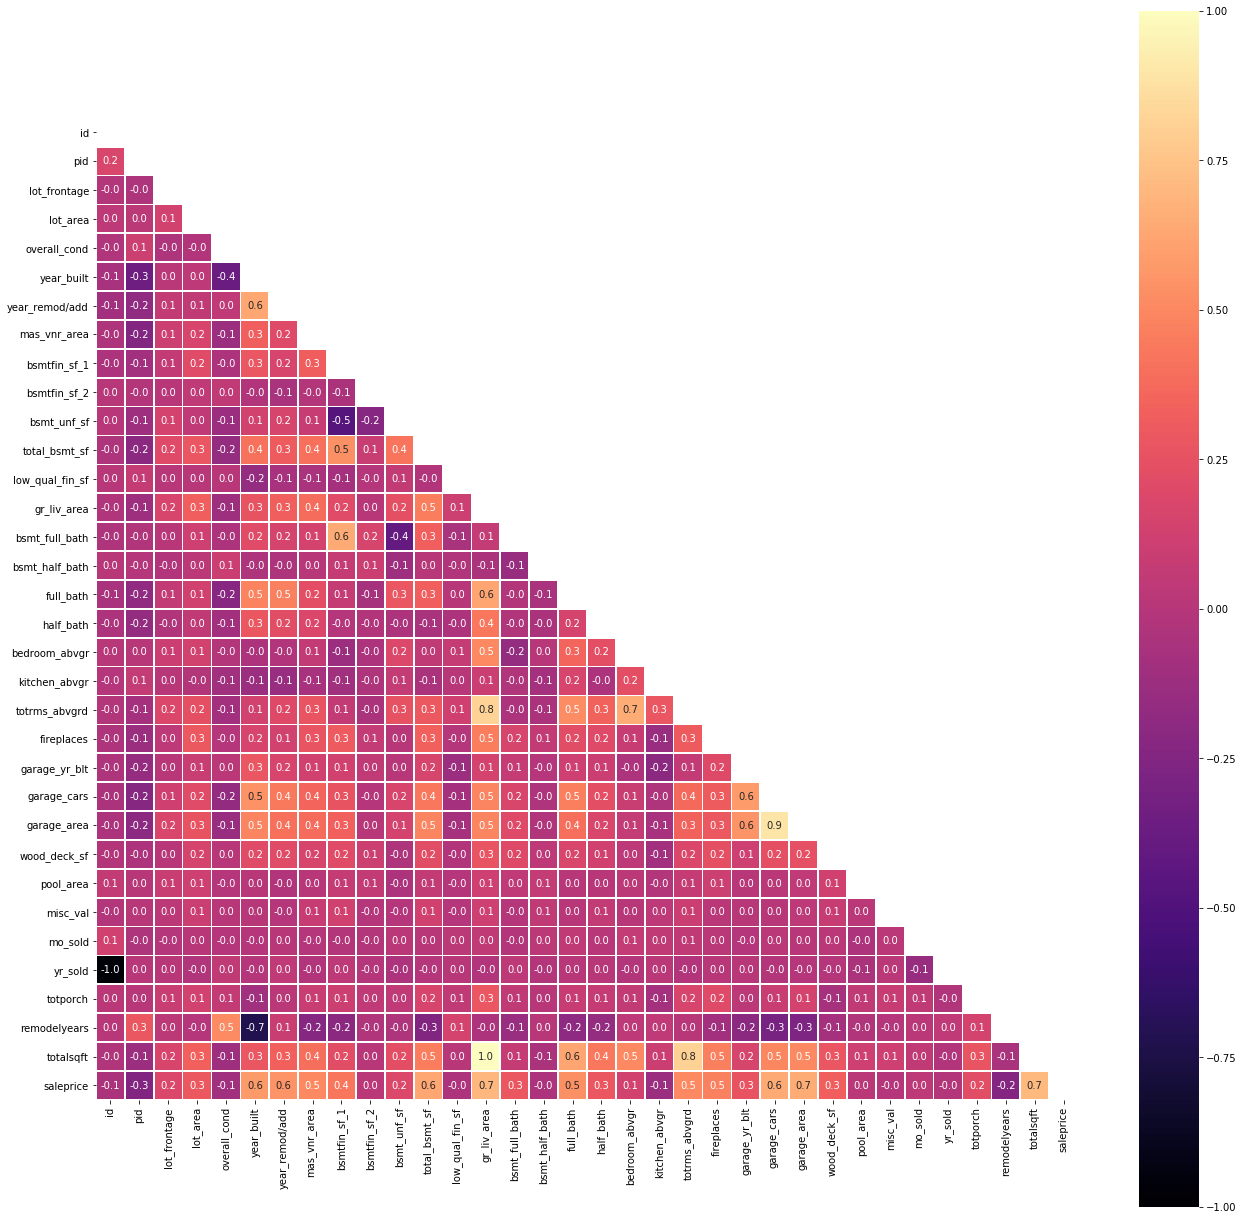

In [8]:
#Let's take a look at a HeatMap

corr = train_clean.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(22,22))
sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True, fmt='.1f', mask=mask, linewidths=0.7, cmap='magma');

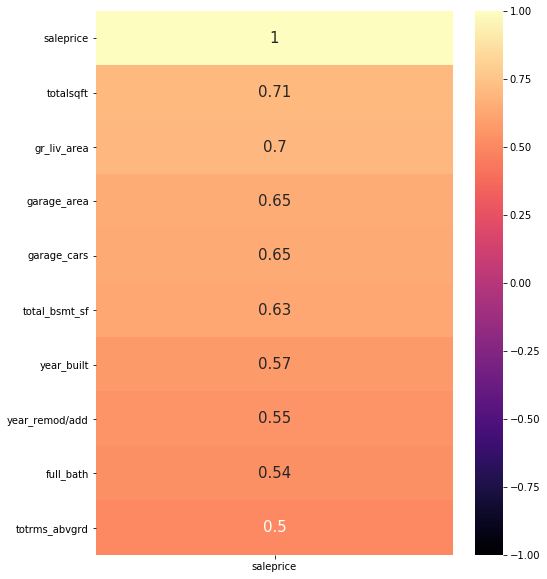

In [59]:
plt.figure(figsize=(8, 10))
sns.heatmap(train_clean.corr()[['saleprice']].sort_values('saleprice', ascending=False).head(10),
           annot=True,
            cmap='magma',
            annot_kws={'fontsize':15},
            vmin=-1,
            vmax=1
           );

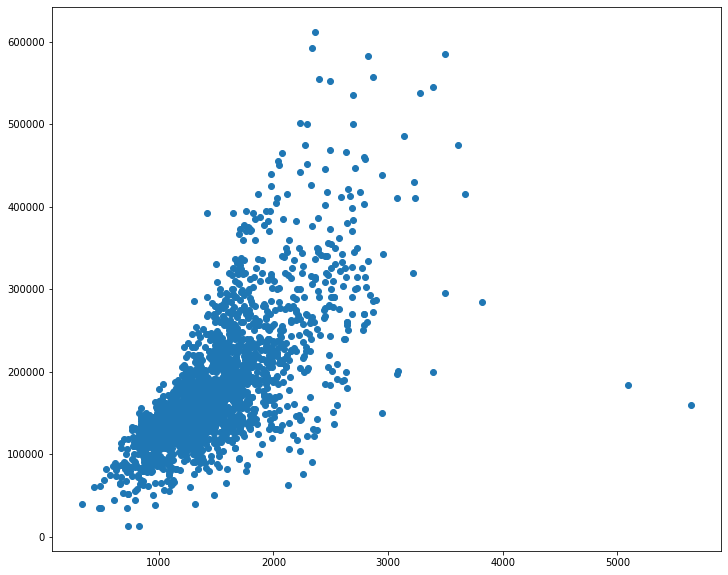

In [10]:
#Looking at the different Xs that will affect our home prices, and in this scatter plot, we're looking at the value of homes as the 
#square footage increases.

plt.figure(figsize=(12,10))
plt.scatter(train_clean['gr_liv_area'],train_clean['saleprice']);

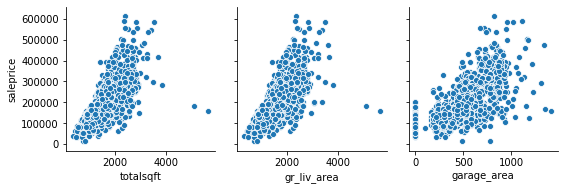

In [11]:
#Checking the highest correlation Xs against our Y (saleprice)

sns.pairplot(train_clean, x_vars=['totalsqft', 'gr_liv_area', 'garage_area'], y_vars=['saleprice']);

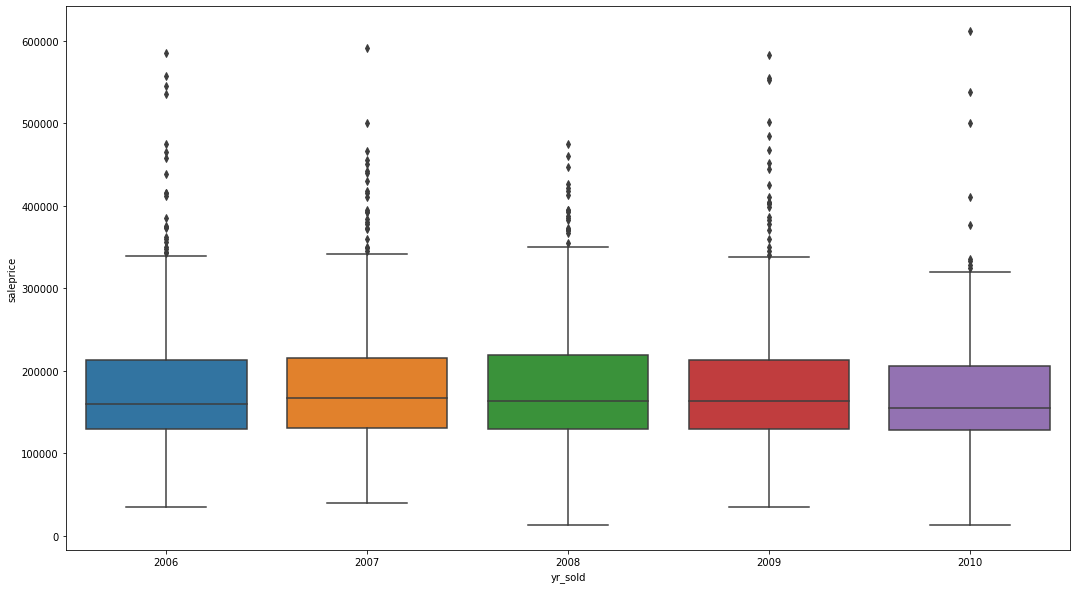

In [12]:
#The 2008 recession and housing market crash had no effect on Aimes, apparently!

plt.figure(figsize=(18,10))
sns.boxplot(x=train_clean['yr_sold'], y=train_clean['saleprice']);

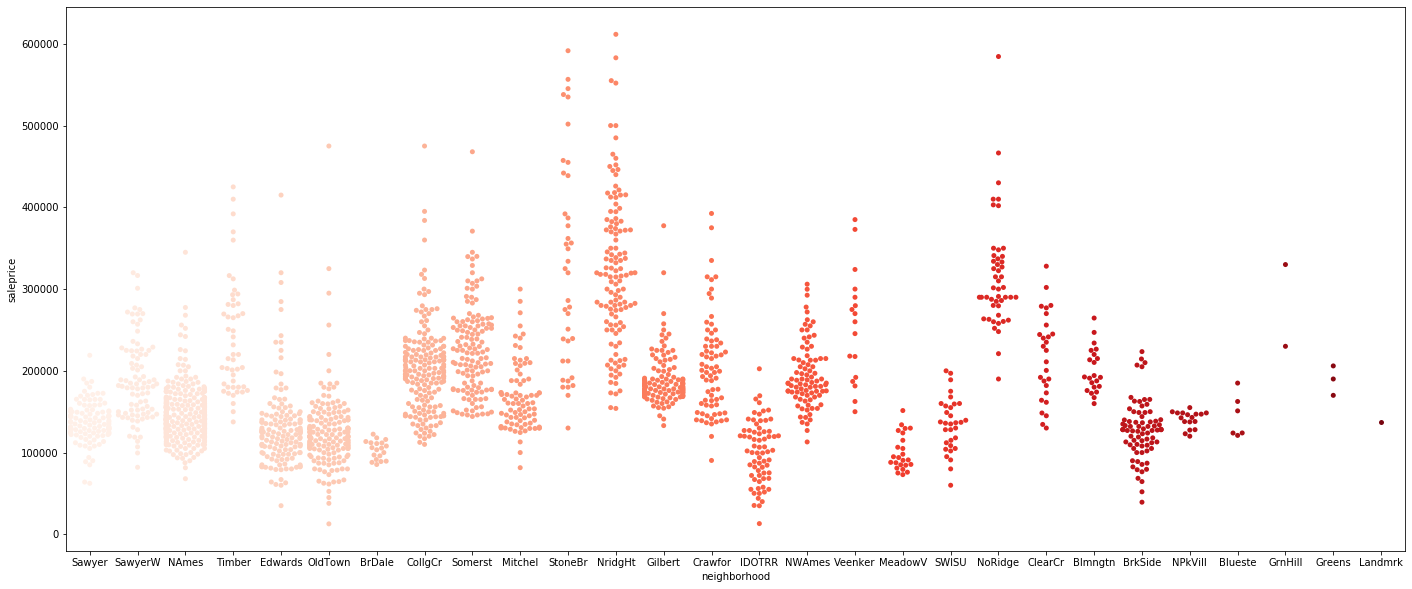

In [50]:
#It looks like homes in certain neighborhoods sell for a much higher price than others. No need for color gradient

plt.figure(figsize=(24,10))
sns.swarmplot(x=train_clean['neighborhood'], y=train_clean['saleprice'], palette='Reds');

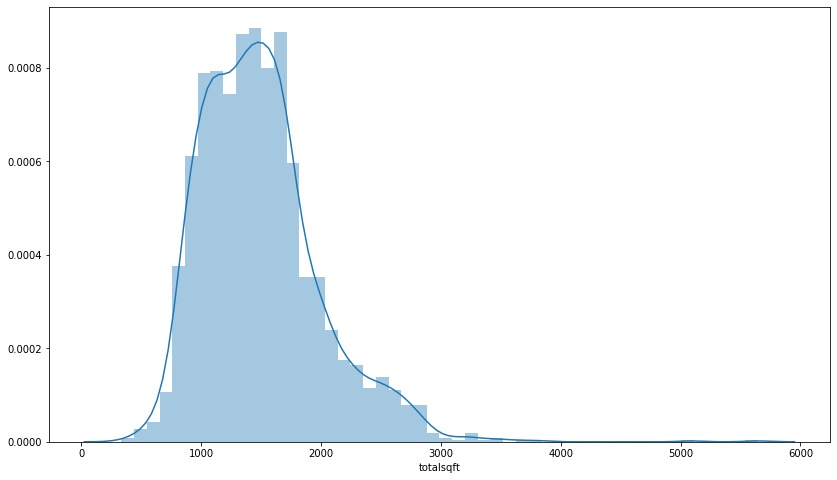

In [51]:
#Looking at the average sqft of the homes in Ames

plt.figure(figsize=(14,8))
sns.distplot(train_clean['totalsqft']);

print('The largest home sold for ${:,.0f} and the smallest for ${:,.0f}'.format(
    train.saleprice.min(), train.saleprice.max()))

print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.saleprice.mean(), train.saleprice.median()))

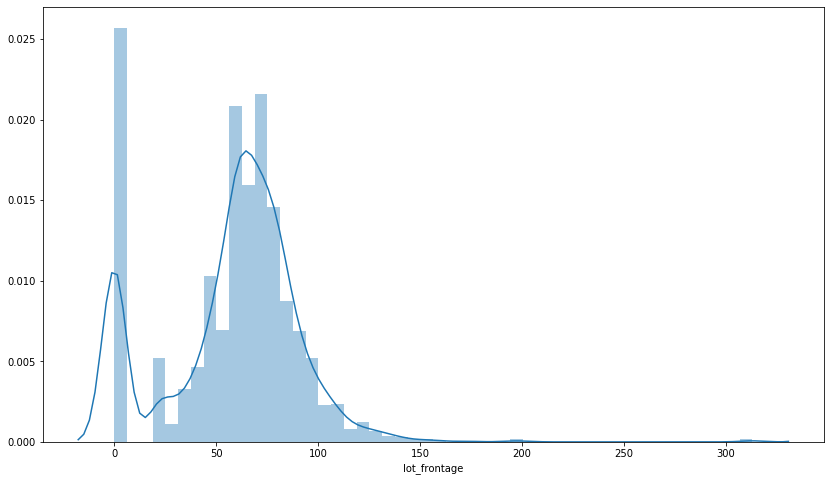

In [52]:
#Looking at the average lot sizes of the homes in Ames

plt.figure(figsize=(14,8))
sns.distplot(train_clean['lot_frontage']);

## Creating our Model

#### We will be scaling our data, and then evaluating differing modeling/machine learning choices to see which one is the best fit

In [15]:
#Instatiating Linear Regression

model = LinearRegression()
lasso = Lasso()
ridge = Ridge()

In [16]:
#Defining X and Y

X = train_clean[['gr_liv_area', 'totalsqft', 'year_built', 'year_remod/add', 'totrms_abvgrd', 'garage_cars', 'garage_area', 'garage_yr_blt', 'total_bsmt_sf']]
y = train_clean['saleprice']

In [17]:
#Splitting our train/test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [18]:
#Fitting out model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

## Generating Predictions and checking scores

In [20]:
#Generating our predictions

y_preds = model.predict(X)

In [21]:
#Checking our scores with Ridge Regression

ridge.fit(Z_train, y_train)

print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))

0.7909392874177001
0.43848256166864596


In [22]:
#Checking our scores and model fit with Lasso Regression

lasso.fit(Z_train, y_train)

print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.7909405596124466
0.43799014373245326


In [23]:
#Checking shapes

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1640, 9)
(411, 9)
(1640,)
(411,)


In [24]:
#Checking our Cross Val Scores:

cross_val_score(model, X_train, y_train)

array([0.78110789, 0.7822051 , 0.75180571, 0.8145748 , 0.78356766])

In [25]:
#Checking our cross val scores on test data

cross_val_score(model, X_test, y_test)

array([0.70716823, 0.69719155, 0.48993042, 0.70991542, 0.29494941])

In [26]:
#Our RSquared values look to be within acceptable parameters.

model.score(X_train, y_train)

0.7909406102653985

## __Model Selection!__

Although the RSquared scores for all three models are very close, it looks like the Linear Regression model just edges ahead and will be the model we use to predict our data.

In [27]:
#Checking RSquared score of the various models.

print(model.score(X_test, y_test))
print(ridge.score(Z_test, y_test))
print(lasso.score(Z_test, y_test))

0.43796804627941754
0.43848256166864596
0.43799014373245326


In [28]:
model.coef_

array([   22.79236177,    59.34487793,   387.12960738,   552.26548339,
       -3463.53297308,  1579.92971254,    62.87981078,    -5.8387695 ,
          54.67094227])

In [29]:
#Creating predictions

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [30]:
mean_squared_error(y_train, y_pred_train)

1354582491.5472436

In [31]:
predicts = model.predict(X)

In [32]:
test_clean.shape

(878, 67)

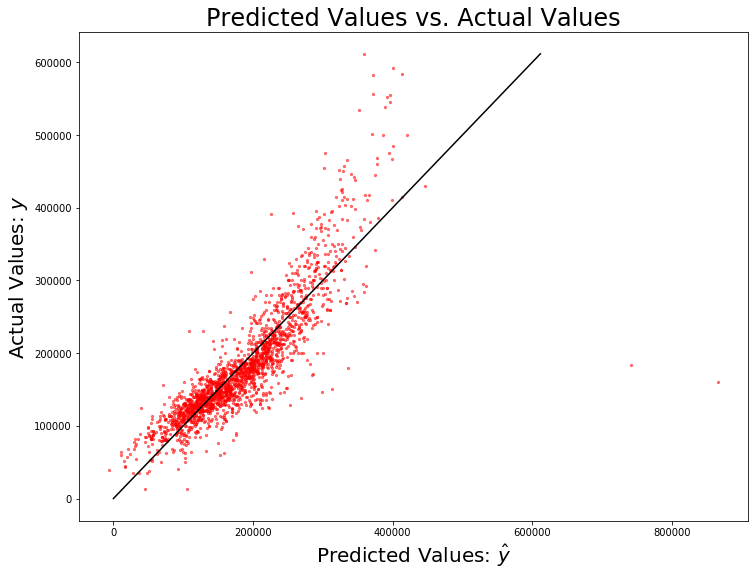

In [33]:
# Plotting the model
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds, y, s=5, color='red', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)], [0, np.max(y)], color = 'black');

#Adding titles and X/Y labels
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [34]:
#Check out the RMSE

np.sqrt(metrics.mean_squared_error(y, y_preds))

41166.84714053084

In [35]:
#And our RSquared score

metrics.r2_score(y, y_preds)

0.7300933599703966

In [36]:
#Do NOT RUN until all other modeling stuff is complete!!!!!

model = sm.OLS(y_train, X_train).fit()

In [37]:
#Do NOT RUN until all other modeling stuff is complete!!!!!

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              4261.
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        14:37:06   Log-Likelihood:                         -19721.
No. Observations:                1640   AIC:                                  3.946e+04
Df Residuals:                    1631   BIC:                                  3.951e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gr_liv_area       -1.3104     18.933     -0.069      0.945     -38.446      35.825
totalsqft         93.1956     18.814      4.953      0.000      56.293     130.098
year_built       185.3115     46.788      3.961      0.000      93.540     277.083
year_remod/add  -189.6535     46.137     -4.111      0.000    -280.148     -99.159
totrms_abvgrd  -6205.5246   1125.141     -5.515      0.000   -8412.399   -3998.651
garage_cars     1.524e+04   3123.494      4.878      0.000    9108.621    2.14e+04
garage_area       57.2799     10.731      5.338      0.000      36.233      78.327
garage_yr_blt    -11.7493      2.785     -4.218      0.000     -17.213      -6.286
total_bsmt_sf     60.5181      2.821     21.450      0.000      54.984      66.052
==============================================================================
Omnibus:                      229.500   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1518.332
Skew:                           0.460   Prob(JB):                         0.00
Kurtosis:                       7.623   Cond. No.                     1.30e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""